<img src="https://user-images.githubusercontent.com/47347216/54076821-ae39c680-42d5-11e9-8cc7-1090358aca62.png?raw=true" width="840" height="260" align="middle" />

### Table of Contents
- 1. [Problem Statement](#section1)</br>
    - 1.1 [Introduction](#section101)<br/>
    - 1.2 [Data source and data set](#section102)<br/>
- 2. [Load the packages and data](#section2)</br>
- 3. [Data profiling](#section3)</br>
    - 3.1 [dtypes](#section301)<br/>
    - 3.2 [head](#section302)<br/>
    - 3.3 [describe](#section303)<br/>
    - 3.4 [sample](#section304)<br/>
    - 3.5 [Pandas profiling](#section305)<br/>
    - 3.6 [Initial observations](#section306)<br/>
    - 3.7 [Final observations](#section307)<br/>
- 4. [Data normalization](#section4)</br>
    - 4.1 [Standardize column headers to lower case](#section401)<br/>
    - 4.2 [Convert timestamp to date-time](#section402)<br/>
    - 4.3 [Missing data and its imputation](#section403)<br/>
    - 4.4 [Outlier Treatment](#section404)<br/>
    - 4.5 [Handling NaN data in categorical variables](#section405)<br/>            
    - 4.6 [Grouping](#section406)<br/>
- 5. [Identify patterns in the data](#section5)</br>
    - 5.1 [Treatment vs work_interfere](#section501)<br/>
    - 5.2 [Age Category Vs seeking treatment](#section502)<br/>
    - 5.3 [Family history Vs Seeking treatment](#section503)<br/>
    - 5.4 [Employee count of Companies](#section505)<br/>
    - 5.5 [Employee Count Vs treatment](#section506)<br/>
    - 5.6 [Using Donut chart to check the relationship between Gender and Treatment](#section507)<br/>
    - 5.7 [Seaborn swarm plot](#section508)<br/>
- 6. [Analysis through questions](#section6)</br>
     - 6.1 [How does the frequency of mental health illness vary by geographic location?](#section601)<br/>
         - 6.1.1 [Which countries contribute the most?](#section602)<br/>
         - 6.1.2 [Which state contributes the most?](#section603)<br/>
         - 6.1.3 [What is the contribution of top 3 countries among all?](#section604)<br/>
         - 6.1.4 [What is the count and percentage of work interfere in work of the employees for the top 3 countries?](#section605)<br/>
         - 6.1.5 [What is the total number of employees going for treatment from the top 3 countries?](#section606)<br/>
         - 6.1.6 [ How many people did go for treatment on the basis of gender for the top 3 countries?](#section607)<br/>
     - 6.2 [Relationship between mental health and attitude.](#section608)<br/>
- 7. [Conclusion](#section7)<br/>

<a id=section1></a> 
## 1. Problem Statement

"US H1B Visa dataset has extracted from US Department of labour Employment site. This public disclosure file contains 2009 year data about the US employeers who employed foreign workers and also the details related to their H1B petition"
<a id=section101></a> 
### 1.1. Introduction
This Exploratory Data Analysis is to practice Python skills learned till now on a structured data set including loading, inspecting, wrangling, exploring, and drawing conclusions from data. The notebook has observations with each step in order to explain thoroughly how to approach the data set. Based on the observation some questions also are answered in the notebook for the reference though not all of them are explored in the analysis. 

<a id=section102></a> 
### 1.2. Data source and dataset

__a__. How was it collected? 

- __Name__: "US H1B Visa-2009 Data Set"
- __Sponsoring Organization__: US Department of Labour Employment
- __Year__: 2009
- __Description__: "US H1B Visa dataset has extracted from US Department of labour Employment website. This public disclosure file contains 2009 year data about the US employeers who employed foreign workers and also the details related to their H1B petition"

__b__. Is it a sample? If yes, was it properly sampled?
- Yes, it is a sample. H1B Dataset have collected from the reliable source. This public disclosure file contains 268244 of Visa cases, however, I have considered One lakh records of H1B petition for the year 2009 but it appears *not* to be a random sample, so we can assume that it is not representative.

DataSource 
https://www.foreignlaborcert.doleta.gov/performancedata.cfm > Disclosure Data Tab > LCA  Programs (H-1B, H-1B1, E-3)
DataSheet Link : https://www.foreignlaborcert.doleta.gov/docs/lca/H-1B_Case_Data_FY2009.xlsx

<a id=section2></a> 
### 2. Load the packages and data 

#### Install SeaBorn & pandas_profiling
```python
!pip install pandas_profiling
!pip install seaborn
```                                                  

In [86]:
# Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100) 
H1_status = pd.read_csv ('https://raw.githubusercontent.com/karthikeyanbalusamy/project/master/H1B_data.csv')
city_master = pd.read_csv ('C:/INSAID/Project/visa/city_repo.csv') # This CSV file contains the master US city data 
H1_status.sample (3)

,SUBMITTED_DATE,CASE_NO,PROGRAM_DESIGNATION,EMPLOYER_NAME,EMPLOYER_ADDRESS1,EMPLOYER_ADDRESS2,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_COUNTY,EMPLOYER_POSTAL_CODE,NBR_IMMIGRANTS,BEGIN_DATE,END_DATE,JOB_TITLE,DOL_DECISION_DATE,OCCUPATIONAL_CODE,OCCUPATIONAL_TITLE,APPROVAL_STATUS,WAGE_RATE_1,RATE_PER_1,MAX_RATE_1,PART_TIME_1,CITY_1,STATE_1,PREVAILING_WAGE_1,WAGE_SOURCE_1,YR_SOURCE_PUB_1,OTHER_WAGE_SOURCE_1,WAGE_RATE__2,RATE_PER_2,MAX_RATE_2,PART_TIME_2,CITY_2,STATE_2,PREVAILING_WAGE_2,WAGE_SOURCE_2,YR_SOURCE_PUB_2,OTHER_WAGE_SOURCE_2,WITHDRAWN
86344,2/20/2009,I-09051-4689663,R,PRICEWATERHOUSECOOPERS LLP,ONE NORTH WACKER DRIVE,0220A1-CHIC,CHICAGO,IL,COOK,60606,35,8/20/2009,8/20/2012,ASSOCIATE (ASSURANCE),2/20/2009,160.0,"ACCOUNTANT, AUDITORS, AND RELATED OCCUPATIONS",CERTIFIED,48200,YR,80000.0,N,CHICAGO,IL,41808,Other,2008.0,OES ONLINE WAGE SURVEY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3597,10/7/2008,I-08232-4449731,R,"GE MEDICAL SYSTEMS, LLC.",3000 NORTH GRANDVIEW BLVD.,NaN,WAUKESHA,WI,WAUKESHA,53188,1,12/4/2008,12/4/2011,CT RECONSTRUCTION ENGINEER,10/7/2008,39.0,OTHER COMPUTER-RELATED OCCUPATIONS,CERTIFIED,70000,YR,80000.0,N,WAUKESHA,WI,65374,Other,2008.0,OES/ONLINE WAGE LIBRARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
96942,3/2/2009,I-09061-4713301,R,EXCELL DATA,1756 114TH AVE. SE,SUITE 220,BELLEVUE,WA,KING,98004,1,3/14/2009,12/9/2011,SOFTWARE ENGINEER,3/2/2009,30.0,OCCUPATIONS IN SYSTEMS ANALYSIS AND PROGRAMMING,CERTIFIED,39,HR,NaN,N,REDMOND,WA,39,Other,2009.0,OES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


<a id=section3></a> 
### 3. Data Profiling

Review the data types and sample data to understand what variables we are dealing with?<br>
Which variables need to be transformed in some way before they can be analyzed?

Below is the reference link for the Column Description
https://www.foreignlaborcert.doleta.gov/pdf/H-1B%20Efile%20Record%20Layout%20FY09.rtf

Additionally, below key-column of the data will be analyzed and perform the necessary transformations as part of Data Engineering.
SUBMITTED_DATE, CASE_NO, EMPLOYER_NAME, NBR_IMMIGRANTS, JOB_TITLE, APPROVAL_STATUS, WAGE_RATE_1,
PROGRAM_DESIGNATION,PREVAILING_WAGE_1,CITY_1

<a id=section301></a> 

In [80]:
H1_status.dtypes                                                                      # Display the data type for each variable

SUBMITTED_DATE           object
CASE_NO                  object
PROGRAM_DESIGNATION      object
EMPLOYER_NAME            object
EMPLOYER_ADDRESS1        object
EMPLOYER_ADDRESS2        object
EMPLOYER_CITY            object
EMPLOYER_STATE           object
EMPLOYER_COUNTY          object
EMPLOYER_POSTAL_CODE     object
NBR_IMMIGRANTS            int64
BEGIN_DATE               object
END_DATE                 object
JOB_TITLE                object
DOL_DECISION_DATE        object
OCCUPATIONAL_CODE       float64
OCCUPATIONAL_TITLE       object
APPROVAL_STATUS          object
WAGE_RATE_1               int64
RATE_PER_1               object
MAX_RATE_1              float64
PART_TIME_1              object
CITY_1                   object
STATE_1                  object
PREVAILING_WAGE_1         int64
WAGE_SOURCE_1            object
YR_SOURCE_PUB_1         float64
OTHER_WAGE_SOURCE_1      object
WAGE_RATE__2            float64
RATE_PER_2               object
MAX_RATE_2              float64
PART_TIM

In [81]:
H1_status.describe(include = 'all')                                                    # Descriptive statistics for the numerical variables

,SUBMITTED_DATE,CASE_NO,PROGRAM_DESIGNATION,EMPLOYER_NAME,EMPLOYER_ADDRESS1,EMPLOYER_ADDRESS2,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_COUNTY,EMPLOYER_POSTAL_CODE,NBR_IMMIGRANTS,BEGIN_DATE,END_DATE,JOB_TITLE,DOL_DECISION_DATE,OCCUPATIONAL_CODE,OCCUPATIONAL_TITLE,APPROVAL_STATUS,WAGE_RATE_1,RATE_PER_1,MAX_RATE_1,PART_TIME_1,CITY_1,STATE_1,PREVAILING_WAGE_1,WAGE_SOURCE_1,YR_SOURCE_PUB_1,OTHER_WAGE_SOURCE_1,WAGE_RATE__2,RATE_PER_2,MAX_RATE_2,PART_TIME_2,CITY_2,STATE_2,PREVAILING_WAGE_2,WAGE_SOURCE_2,YR_SOURCE_PUB_2,OTHER_WAGE_SOURCE_2,WITHDRAWN
count,100000,100000,100000,100000,100000,41498,100000,100000,89388,100000,100000.00000,100000,100000,100000,100000,99990.000000,99990,100000,1.000000e+05,100000,2.221400e+04,100000,100000,100000,1.000000e+05,100000,86243.000000,86227,1.141400e+04,11414,2.333000e+03,11414,11412,11414,11414.000000,11414,10877.000000,10877,100000
unique,159,100000,4,25471,24860,3652,3348,57,933,8116,NaN,354,1393,20769,156,NaN,105,2,NaN,5,NaN,2,5318,57,NaN,3,NaN,1316,NaN,4,NaN,2,1917,54,NaN,3,NaN,390,2
top,3/3/2009,I-09054-4692629,R,MICROSOFT CORPORATION,ONE MICROSOFT WAY,SUITE 200,NEW YORK,CA,MIDDLESEX,98052,NaN,1/1/2009,12/31/2011,PROGRAMMER ANALYST,3/3/2009,NaN,OCCUPATIONS IN SYSTEMS ANALYSIS AND PROGRAMMING,CERTIFIED,NaN,YR,NaN,N,NEW YORK,CA,NaN,Other,NaN,ONLINE WAGE LIBRARY,NaN,yr,NaN,N,NEW YORK,NJ,NaN,Other,NaN,Online Wage Library,N
freq,2034,1,97606,1531,1532,1125,6061,14831,8576,1611,NaN,2309,1212,13318,2032,NaN,45611,99506,NaN,90200,NaN,96117,6860,16983,NaN,86240,NaN,18461,NaN,9673,NaN,10689,431,1385,NaN,10875,NaN,2096,89930
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.72832,NaN,NaN,NaN,NaN,59.574977,NaN,NaN,7.204214e+04,NaN,8.847769e+04,NaN,NaN,NaN,5.939195e+04,NaN,2008.134086,NaN,6.025085e+04,NaN,6.923102e+04,NaN,NaN,NaN,50015.044770,NaN,2008.204560,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.47247,NaN,NaN,NaN,NaN,53.186203,NaN,NaN,8.972522e+05,NaN,7.521297e+05,NaN,NaN,NaN,7.336267e+05,NaN,9.604924,NaN,1.040692e+05,NaN,5.820218e+04,NaN,NaN,NaN,29012.685669,NaN,0.468761,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,6.000000e+00,NaN,7.000000e+00,NaN,NaN,NaN,1.000000e+00,NaN,11.000000,NaN,6.000000e+00,NaN,1.000000e+01,NaN,NaN,NaN,6.000000,NaN,2006.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,30.000000,NaN,NaN,4.800000e+04,NaN,6.000000e+04,NaN,NaN,NaN,4.239000e+04,NaN,2008.000000,NaN,5.000000e+04,NaN,5.200000e+04,NaN,NaN,NaN,44020.750000,NaN,2008.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,30.000000,NaN,NaN,6.000000e+04,NaN,8.000000e+04,NaN,NaN,NaN,5.500000e+04,NaN,2008.000000,NaN,6.000000e+04,NaN,7.000000e+04,NaN,NaN,NaN,51397.000000,NaN,2008.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,90.000000,NaN,NaN,8.000000e+04,NaN,1.050000e+05,NaN,NaN,NaN,7.080300e+04,NaN,2008.000000,NaN,7.000000e+04,NaN,1.000000e+05,NaN,NaN,NaN,61697.500000,NaN,2008.000000,NaN,NaN


In [87]:
# Analysing the CITY column data
city_master["CITY_1"] = city_master["CITY_1"].str.lower().str.strip()
H1_status["CITY_1"] = H1_status["CITY_1"].str.lower().str.strip()
H1_status['CITY_1'].tail(4500).unique()

array(['rancho dominguez', 'lake forest', 'los angeles', 'houston',
       'fremont', 'burbank', 'irvine', 'atlanta', 'san francisco',
       'lynchburg', 'cincinnati', 'jacksonville', 'shelton',
       'west des moines', 'wauwatosa', 'hillsborough', 'santa ana',
       'washington dc', 'portland', 'beaverton', 'marlborough',
       'new york', 'morristown', 'oakhill', 'edison', 'chicago',
       'parsippany', 'warwick', 'boca raton', 'sylmar', 'lemont',
       'roswell', 'anchorage', 'alpharetta', 'scottsdale', 'brea',
       'irwindale', 'palo alto', 'santa clara', 'san jose', 'denver',
       'richmond', 'san diego', 'windsor', 'marietta', 'federal way',
       'bloomington', 'salt lake city', 'dallas', 'boston', 'n bothell',
       'phoenix', 'chatsworth', 'tempe', 'louisville', 'milwaukee',
       'warren', 'westborough', 'arlington', 'st. paul', 'erie',
       'springdale', 'englewood,', 'southborough', 'south portland',
       'mountain view', 'somerset', 'secaucus', 'scranton',

In [83]:
H1_status['CITY_1'].min()


'1'

#### Observations

Noticed the CITY column contains many invalid data. For Example:
'1','chicago illinois metro area analysis','bethesda-gaithersburg-frederick, md metro'  etc. 
Hence, Master city csv file is created with all the US CITY names, which will be compared with the CITY field in the H1B Dataset. Invalid city data will be identified and replaced with NaN.

In [84]:
#Analysis of Program Designation 
H1_status['PROGRAM_DESIGNATION'].unique()

array(['R', 'A', 'C', 'S'], dtype=object)

#### Observations
Program Designation have the code, which indicates the type of temporary application submitted for processing. R = H-1B; A = E-3 Australian; C = H-1B1 Chile; S = H-1B1 Singapore. Hence the description column will be created and map the code with Visa description for better understanding & readability.

In [91]:
#Analysis of JOB TITLE data
H1_status["JOB_TITLE"] = H1_status["JOB_TITLE"].str.strip()
H1_status.JOB_TITLE.tail(1000).unique()

array(['POSTDOCTORAL ASSOCIATE', 'PROJECT ENGINEER', 'SOFTWARE ENGINEER',
       'OPERATIONS ANALYST', 'BUSINESS CONSULTING MANAGER',
       'SENIOR SOFTWARE ENGINEER', 'PROGRAMMER ANALYST', 'INSTRUCTOR',
       'ARCHITECTURAL HISTORIAN', 'FINANCIAL DIRECTOR',
       'APPLICATION DEVELOPER', 'MARKET RESEARCH ANALYST',
       'ASSISTANT PROFESSOR', 'POSTDOCTORAL RESEARCH ASSOCIATE',
       'CUSTOMER TRAINING AND SUPPORT SCIENTIST',
       'NEPHROLOGY NURSE SPECIALIST', 'OCCUPATIONAL THERAPIST',
       'CLAIMS AND CONTRACTS ANALYST',
       'COMMERCIAL AND INDUSTRIAL DESIGNER', 'CLINICAL STAFF PHYSICIST',
       'COMPUTER SYSTEMS ANALYST / PROGRAMMER',
       'INTERIOR DESIGNER/PROJECT MANAGER',
       'PROGRAMMER ANALYST (SR. JAVA CONSULTANT)',
       'CIVIL ENGINEERING DRAFTER', 'FACULTY, ASSISTANT PROFESSOR',
       'BUSINESS MANAGEMENT ANALYST', 'APPLICATIONS ENGINEER',
       'COMPUTER HARDWARE ENGINEER',
       'SENIOR QA & SYSTEMS INTEGRATION ENGINEER', 'GIS PRODUCT ENGINEER',
   

In [90]:
df = pd.DataFrame (H1_status,columns=['JOB_TITLE','PREVAILING_WAGE_1'])
df1 = df.groupby(['JOB_TITLE']).max()[['PREVAILING_WAGE_1']]
df1 = df1.sort_values(by='PREVAILING_WAGE_1', ascending=False)
df1.head(6)

,PREVAILING_WAGE_1
JOB_TITLE,
2222,222222222
SYSTEMS ANALYST,46613000
RESEARCH WORKER,44068382
SR. APPLICATIONS ENGINEER,7920600
SENIOR SOFTWARE ENGINEER,7500000
COMPUTER SUPORT SPECIALIST,6400000


#### Observations
While analyzing, noticed that the JOB_TITLE column have invalid data '2222' also which has extremely high salary '222222222'. Hence this is listed top in high salaried job. JOB TITLE '2222' will be dropped.

In [29]:
import pandas_profiling                                     
profile = pandas_profiling.ProfileReport(H1_status)
profile

Number of variables,39
Number of observations,100000
Total Missing (%),16.1%
Total size in memory,18.7 MiB
Average record size in memory,196.0 B
Numeric,5
Categorical,28
Boolean,0
Date,0
Text (Unique),1
Rejected,5


<a id=section304></a> 

<a id=section307></a> 
### 3.7. Final observations 
- Summary of data types in this dataset:

It has been observed that most of the data are seems to be fine, except few. For Instance,
- __CITY_1__ has many invalid data. To clean up, data will be compared with the master city list (another CSV file). If it does not match, then the invalid data will be replaced with NaN. Refer the section 3: Data Profiling.

- __Program Destignation__ column has code to indicate the Visa Type. Hence, for better readibility and graph plotting, description column will be created and map the code with Visa description.

- __JOB_TITLE__ column has the invalid data '2222'. which also has the highest salaried value '222222222', which will impact the highest salaried job. Hence this outlier row will be dropped.


<a id=section4></a> 
### 4. Data Normalization

<a id=section401><a/>

### 4.1. Clean up the CITY data

In [93]:
# Step 1: List is created from the Master CITY Data
# Step 2: H1B City data is compared with the Master City List in Step 1. 
# If it does not match, then it is replaced with NaN
def createList():
    mylist = []
    for i in city_master["CITY_1"]: 
        mylist.append(i)
    return mylist
H1_status['CITY_1']=H1_status['CITY_1'].apply(lambda x:x if x in createList() else np.nan)

In [99]:
H1_status['CITY_1'].tail(4500).unique()

array([nan, 'lake forest', 'los angeles', 'houston', 'fremont', 'burbank',
       'irvine', 'atlanta', 'san francisco', 'lynchburg', 'cincinnati',
       'jacksonville', 'shelton', 'west des moines', 'wauwatosa',
       'hillsborough', 'santa ana', 'portland', 'beaverton',
       'marlborough', 'new york', 'morristown', 'edison', 'chicago',
       'parsippany', 'warwick', 'boca raton', 'lemont', 'roswell',
       'anchorage', 'alpharetta', 'scottsdale', 'brea', 'irwindale',
       'palo alto', 'santa clara', 'san jose', 'denver', 'richmond',
       'san diego', 'windsor', 'marietta', 'federal way', 'bloomington',
       'salt lake city', 'dallas', 'boston', 'phoenix', 'chatsworth',
       'tempe', 'louisville', 'milwaukee', 'warren', 'westborough',
       'arlington', 'erie', 'springdale', 'south portland',
       'mountain view', 'somerset', 'secaucus', 'scranton', 'rochester',
       'portsmouth', 'auburn hills', 'philadelphia', 'moosic',
       'minnetonka', 'mayfield heights', 'kan

#### Observations
Invalid CITY names are replaced with NaN. Invalid data observed in section 3 is not available.

### 4.1. Map the PROGRAM_DESIGNATION Code with the VISA Type Description

In [101]:
# Description column will be created and map the code

H1_status['VISA_TYPE'] = H1_status['PROGRAM_DESIGNATION']                                                        # Make a copy of the column to preserve the original data. Work with the new column going forward.

H1B = ["R"]                                                                                        # Assign each type of response to one of two categories
E3_Australian = ["A"]
H1B1_Chile = ['C']
H1B1_Singapore = ['S']

H1_status['VISA_TYPE'] = H1_status['VISA_TYPE'].apply(lambda x:"H1B" if x in H1B else x)
H1_status['VISA_TYPE'] = H1_status['VISA_TYPE'].apply(lambda x:"E3 Australian" if x in E3_Australian else x)
H1_status['VISA_TYPE'] = H1_status['VISA_TYPE'].apply(lambda x:"H1B1 Chile" if x in H1B1_Chile else x)
H1_status['VISA_TYPE'] = H1_status['VISA_TYPE'].apply(lambda x:"H1B1 Singapore" if x in H1B1_Singapore else x)                                       # Confirm that all variable names are now lower case

In [120]:
(H1_status.VISA_TYPE.value_counts()/len(H1_status)*100)

H1B               97.606
E3 Australian      1.832
H1B1 Singapore     0.306
H1B1 Chile         0.256
Name: VISA_TYPE, dtype: float64

#### Observations
Visa Type column is created with the Visa description. It enables the user to interpret the Visa description easily.

### 4.2. Remove Outliers in JOB TITLE column

In [102]:
df[df['JOB_TITLE'] == '2222']

,JOB_TITLE,PREVAILING_WAGE_1
40380,2222,222222222


In [103]:
df=df.drop(df.index[40380])

In [104]:
df1 = df.groupby(['JOB_TITLE']).max()[['PREVAILING_WAGE_1']]
df1 = df1.sort_values(by='PREVAILING_WAGE_1', ascending=False)
df1.head(5)

,PREVAILING_WAGE_1
JOB_TITLE,
SYSTEMS ANALYST,46613000
RESEARCH WORKER,44068382
SR. APPLICATIONS ENGINEER,7920600
SENIOR SOFTWARE ENGINEER,7500000
COMPUTER SUPORT SPECIALIST,6400000


#### Observations
After dropping the JOB TITLE  = '2222' (outlier), valid jobs are shown in the data.

### 5. Analysis

#### Number of H1B Visa applied for each Visa Category

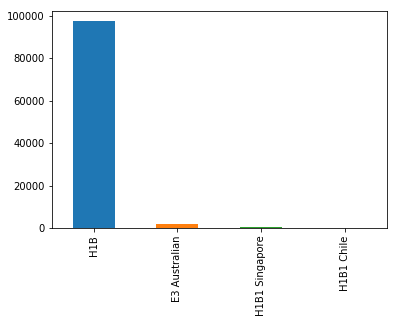

In [4]:
H1_status.VISA_TYPE.value_counts().plot.bar()

#### Observations:
It can be infered from the above plot that the __97%__ of Visa are applied for H1B. Other visa catagories are less than 2%.


#### Top 20 Employeer applied for H1B Visa

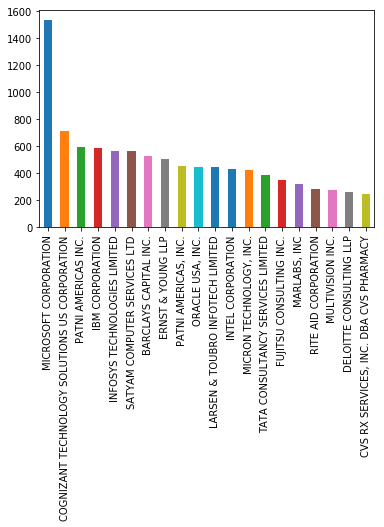

In [5]:
# Top 20 Employeer applied for H1B Visa
H1_status.EMPLOYER_NAME.value_counts().head(20).plot.bar()

#### Observations:
Microsoft is the top company applied for H1B Visa, followed by CTS, PATNI, IBM & Infosys. As opposed to other industry, IT companies are the topper in applying for the visa

### # Top Jobs applied for H1B Visa

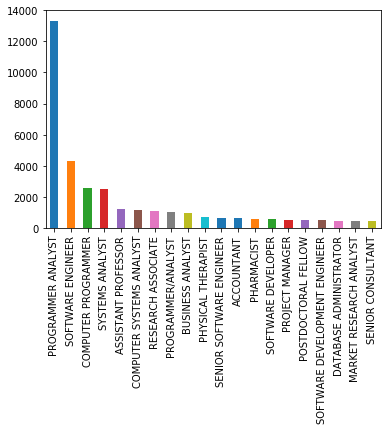

In [6]:
H1_status.JOB_TITLE.value_counts().head(20).plot.bar()

#### Observations:
- It has been observed that Programmer Analyst has the top in applying for the H1B visa, followed by Software Engineer, Computer Programmer, System Analyst, Assistant Professor. It clearly indicates that more job demand for Software industry.

### # Top Salaried jobs

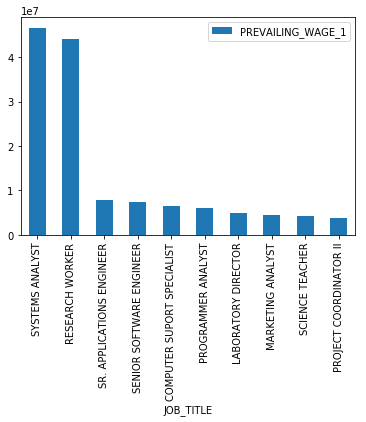

In [49]:
df1 = df.groupby(['JOB_TITLE']).max()[['PREVAILING_WAGE_1']]
df1 = df1.sort_values(by='PREVAILING_WAGE_1', ascending=False)
df1.head(10).plot.bar()

#### Observations:
- System Analyst, Research Worker are teh top most paid job in US. Followed by Sr. Applications Engineer, Sr. Software Engineer, Computer Support Specialist.

### # Approval Status by Visa Type

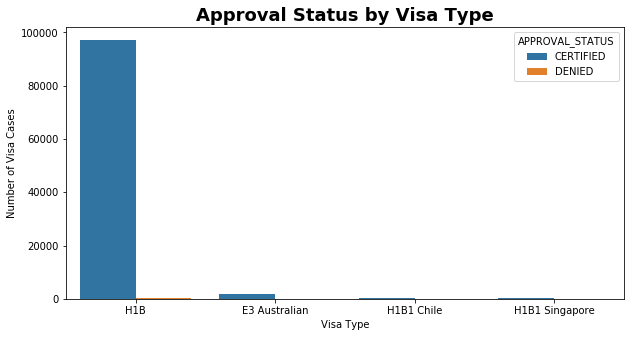

In [8]:
plt.figure(figsize=(10,5))
sns.countplot("VISA_TYPE", hue="APPROVAL_STATUS", data=H1_status)
plt.title("Approval Status by Visa Type",fontsize=18,fontweight="bold")
plt.ylabel("Number of Visa Cases")
plt.xlabel("Visa Type")
plt.show()

#### Observations:
Rejected Visas are in H1B Visa catagory, other visa types such as Australian; H-1B1 Chile, H-1B1 Singapore have no rejection.

### # Employee Preferred City

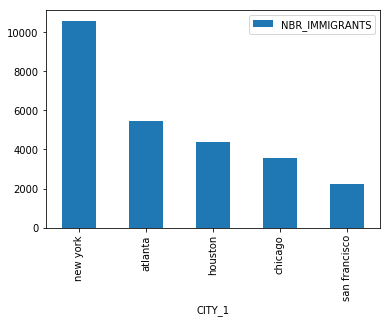

In [97]:
df1 = H1_status.groupby(['CITY_1']).sum()[['NBR_IMMIGRANTS']]
df1 = df1.sort_values(by='NBR_IMMIGRANTS', ascending=False,na_position='last')
df1.head(5).plot.bar()

#### Observations:
- Most of the workers (aound __50%__) prefers to work in __New York__ city.
- Next 50% of the people prefers the below cities:
  Houston (18%), Chicago (12%), Redmond (11%) & Atlanta (10%)
- Overall, New York stands in top, while comparing to other cites.

### Conclusion

- H1B Visa petition analysis being conducted helps us to know the Demand on Jobs, Highly paid salary on Jobs, Employers creation more opportunities & Employee preferred city.

- Based on the result, this certainly helps the US Job workers to make a decision on the above data.

- IT Industry is the top in different parameters such as Salary, Demand and employers as opposed to other industry.
